In [1]:
import numpy as np
import pandas as pd

import matplotlib as mp
import matplotlib.pyplot as plt

## Problem 1

In [5]:
data = np.load("eegdata.npy")

In [6]:
data.shape

(600, 4400)

In [7]:
f = open("events.txt", "r")
full_data = f.readlines()

In [8]:
#full_data

In [9]:
events = pd.read_csv("events.txt", sep=",", header = 0, skipinitialspace=True)

In [10]:
events.head

<bound method NDFrame.head of      session  list  serialpos  recalled
0          0     1          1         1
1          0     1          2         0
2          0     1          3         1
3          0     1          4         0
4          0     1          5         0
5          0     1          6         0
6          0     1          7         0
7          0     1          8         0
8          0     1          9         1
9          0     1         10         1
10         0     1         11         1
11         0     1         12         0
12         0     2          1         0
13         0     2          2         0
14         0     2          3         0
15         0     2          4         0
16         0     2          5         0
17         0     2          6         0
18         0     2          7         0
19         0     2          8         0
20         0     2          9         0
21         0     2         10         0
22         0     2         11         1
23        

In [84]:
#events.recalled

In [11]:
data_copy = np.copy(data)

In [12]:
data_copy

array([[-115.90131982,  -90.64392263,  -94.0602373 , ...,  173.53724919,
         200.07956341,  164.47276084],
       [-488.4647284 , -521.40544435, -512.25093839, ..., -484.50990701,
        -487.3372339 , -411.64467752],
       [-667.57530556, -577.66167547, -454.15470929, ...,  242.74032611,
         234.15083211,  223.89495639],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])

In [13]:
#data_copy = np.delete(data_copy,[1,1000], 1)

In [14]:
#data_copy.shape

In [15]:
data_copy = data_copy[:,1000:3400]

In [16]:
data_copy.shape

(600, 2400)

## Problem 2

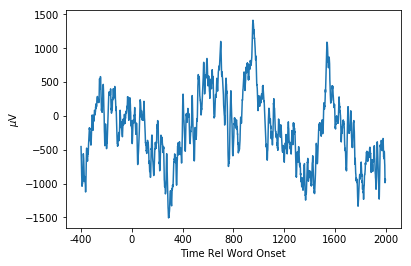

In [17]:
x = range(2400)
y = data_copy[0] #first row of data in eeg
plt.plot(x,y)

plt.xlabel("Time Rel Word Onset")
plt.ylabel('$\mu$V')
#xticks(ticklocation, ticklabels)

#(locations, labels) = plt.xticks()
plt.xticks([0, 400, 800, 1200, 1600, 2000, 2400], [-400, 0, 400, 800, 1200, 1600, 2000])
plt.show()

## Problem 3

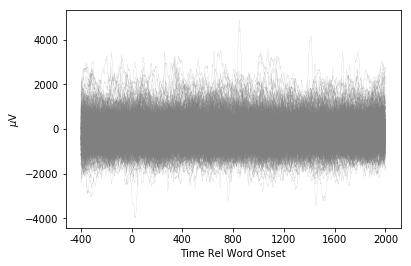

In [18]:
y = data_copy[:][:] #all rows of eeg data
plt.plot(y.T, color='gray', linewidth=0.1) #creates object from scratch that become the active one

plt.xlabel("Time Rel Word Onset")
plt.ylabel('$\mu$V')
plt.xticks([0, 400, 800, 1200, 1600, 2000, 2400], [-400, 0, 400, 800, 1200, 1600, 2000])
plt.show()

In [19]:
y.shape

(600, 2400)

In [17]:
y.T.shape

(2400, 600)

## Problem 4

In [20]:
type(data_copy)

numpy.ndarray

In [21]:
baseline = data_copy[:,0:400]
raw = data_copy[:,0:]

In [22]:
baseline.shape

(600, 400)

In [23]:
raw.shape

(600, 2400)

In [24]:
baseline_avgs = np.nanmean(baseline, axis=1)

raw_avgs = np.nanmean(raw, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
baseline_avgs.shape

(600,)

In [28]:
raw_avgs.shape

(600,)

## Problem 5

In [29]:
corrected = raw - baseline_avgs #fancy function that python does

ValueError: operands could not be broadcast together with shapes (600,2400) (600,) 

In [31]:
corrected = np.empty(shape=[600, 2400])

counter = 0
for column in raw.T:
    r = column - baseline_avgs
    #print(r.shape)
    #print(r)
    corrected[:, counter] = r
    counter += 1

In [32]:
corrected.shape

(600, 2400)

## Problem 6

In [33]:
time_averages = []
for column in raw.T:
    q = np.nanmean(column)
    time_averages.append(q)


In [34]:
len(time_averages)

2400

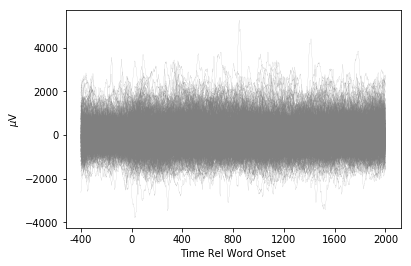

In [35]:
y = corrected #all rows of eeg data
plt.plot(y.T, color='gray', linewidth=0.1) #creates object from scratch that become the active one

plt.xlabel("Time Rel Word Onset")
plt.ylabel('$\mu$V')
plt.xticks([0, 400, 800, 1200, 1600, 2000, 2400], [-400, 0, 400, 800, 1200, 1600, 2000])
plt.show()

## Problem 7

In [36]:
recs = events.recalled
recs = np.array(recs)

In [37]:
events.recalled[10]

1

In [38]:
type(recs)

numpy.ndarray

In [39]:
np.sum(recs == 1) #all places where the subject did recall

219

In [40]:
recalled_rows = np.empty(shape=[219, 2400])
notrecalled_rows = np.empty(shape=[600-219, 2400])

In [41]:
recalled_rows.shape

(219, 2400)

In [117]:
"""c1 = 0
c2 = 0
for index, item in enumerate(range(600)):
    r = corrected[index]
    print(r.shape)
    if events.recalled[index] == 0:
        notrecalled_rows[:, c1] = r
        c1 += 1
    if events.recalled[index] == 1: 
        recalled_rows[:, c2] = r
        c2 += 1"""

(2400,)


ValueError: could not broadcast input array from shape (2400) into shape (219)

In [42]:
c1 = 0
c2 = 0
for index, item in enumerate(range(600)):
    r = corrected[index]
    #print(r.shape)
    if events.recalled[index] == 0:
        notrecalled_rows[c1, :] = r
        c1 += 1    
    if events.recalled[index] == 1: 
        recalled_rows[c2, :] = r
        c2 += 1

In [43]:
np.nanmean(recalled_rows, axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


array([-108.17898587, -141.48319919,  410.39847701, -681.87256069,
       -200.80242694,  -94.01748946,    1.03457343,    9.74673993,
        253.88313471, -197.3494221 ,  189.52904834,  -31.87548342,
        304.36281443,  -24.35322843,  244.36724659, -166.73933977,
        -65.41842639, -557.99201497,  439.35702415,   -2.66218271,
        201.65449537,  -42.50011246, -121.68386041,  275.34053175,
        257.76311818,  173.24162561,  -55.75518213, -183.0617996 ,
        277.98177224,    2.47488622, -480.73599364,  -33.7213732 ,
       -353.57057485, -268.4859468 ,   -7.23226495, -498.8254221 ,
        163.12561374,  186.62916365,  -16.71002818,  154.93060169,
        336.20809048, -141.34409697,  154.00125777, -366.31549011,
        346.7976382 ,  203.81645537,   -9.59181539, -355.9551277 ,
         20.94517983,  183.92568182, -150.10589166,  207.73030173,
        -22.83078688, -369.75015283,  300.24201593, -110.40630069,
       -106.49307316,   67.48554965,  444.8203607 ,  -21.76072

/usr/lib/python3/dist-packages/matplotlib/legend.py:932: UserWarning: Legend does not support array([-16.82715771, -18.78236946, -21.33882866, ...,  35.70011676,
        32.21447956,  28.22035273]) instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/lib/python3/dist-packages/matplotlib/legend.py:932: UserWarning: Legend does not support array([37.03236045, 34.35626577, 31.69936652, ...,  5.54085497,
        0.11500649, -1.08545167]) instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


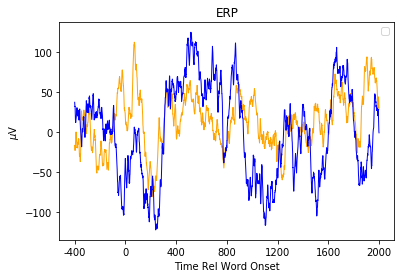

In [44]:
y = np.nanmean(notrecalled_rows, axis = 0)
y2 = np.nanmean(recalled_rows, axis = 0)
plt.plot(y.T, color='orange', linewidth=1) #creates object from scratch that become the active one
plt.plot(y2.T, color='blue', linewidth=1) #creates object from scratch that become the active one

plt.xlabel("Time Rel Word Onset")
plt.ylabel('$\mu$V')
plt.xticks([0, 400, 800, 1200, 1600, 2000, 2400], [-400, 0, 400, 800, 1200, 1600, 2000])
plt.legend((y.T, y2.T), ('not', 'rec',))

plt.title("ERP")
plt.show()

In [45]:
events.head()

,session,list,serialpos,recalled
0,0,1,1,1
1,0,1,2,0
2,0,1,3,1
3,0,1,4,0
4,0,1,5,0
